# Proyecto 4

Este proyecto se basa en el proyecto 3 de series de tiempo. 
Veremos a continuación una red neuronal LSTM (Long Short Term Memory) y la librería Prophet de Facebook en acción y compararemos los resultados con el mejor modelo del proyecto 3 SARIMAX One-Step

Git personal: https://github.com/NicoLorenzon

Repositorio del proyecto 3 : https://github.com/NicoLorenzon/Proyecto-3-Series-De-Tiempo

Dataset flujo vehícular AUSA 2020: https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa/archivo/2a130520-000a-40c3-b6c7-81449dcb7c56

En este proyecto buscaremos predecir el flujo vehicular de la autopista AUSA de Buenos Aires para el año 2021, utilizaremos los datos de los años 2017, 2018, 2019 y 2020.

Para el primer paso vamos a importar las librerías para empezar a cargar y leer los archivos.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Primero leeremos los 3 años que ya estudiamos en el proyecto anterior y por separado estudiaremos el año 2020 que como ya sabemos fue un año atípico por causa de la pandemia.

In [2]:
data17 = pd.read_csv('flujo-vehicular-2017.csv', sep= ",")
data18 = pd.read_csv('flujo-vehicular-2018.csv', sep= ",")
data19 = pd.read_csv('flujo-vehicular-2019.csv', sep= ",")

In [3]:
data19.info()
data19.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data18.info()
data19.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [5]:
data17.info()
data19.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

Investigamos los campos estacion, sentido, tipo_vehiculo y forma_pago.

In [6]:
print(data17['estacion'].unique())
print(data18['estacion'].unique())
print(data19['estacion'].unique())

['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']


In [7]:
print(data17['sentido'].unique())
print(data18['sentido'].unique())
print(data19['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data17['tipo_vehiculo'].unique())
print(data18['tipo_vehiculo'].unique())
print(data19['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data17['forma_pago'].unique())
print(data18['forma_pago'].unique())
print(data19['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']


Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

periodo: año del dset

fecha: año dia mes

hora_inicio hora de inicio de la cuenta de vehiculos (DROP)

hora_fin hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

dia: dia de la semana

estacion: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

sentido: Centro o Provincia

tipo_vehiculo: Liviano o Pesado

forma_pago: Hay varias y varian entre los años.

cantidad_pasos: Cantidad de vehiculos


Vamos a estar trabajando con la estación Illia y la forma de pago Efectivo

In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data19, data18, data17])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

df = dataset
df.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
df['fecha2'] = pd.to_datetime(df.fecha) + pd.to_timedelta(df.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
df.drop(columns=['fecha','hora_fin'], inplace = True)

df.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
df.rename(columns = {'fecha2':'fecha'}, inplace = True) 
df.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
# Ordenamos por fecha
df.sort_values('fecha', inplace=True)
df.reset_index(drop=True, inplace=True)
df

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

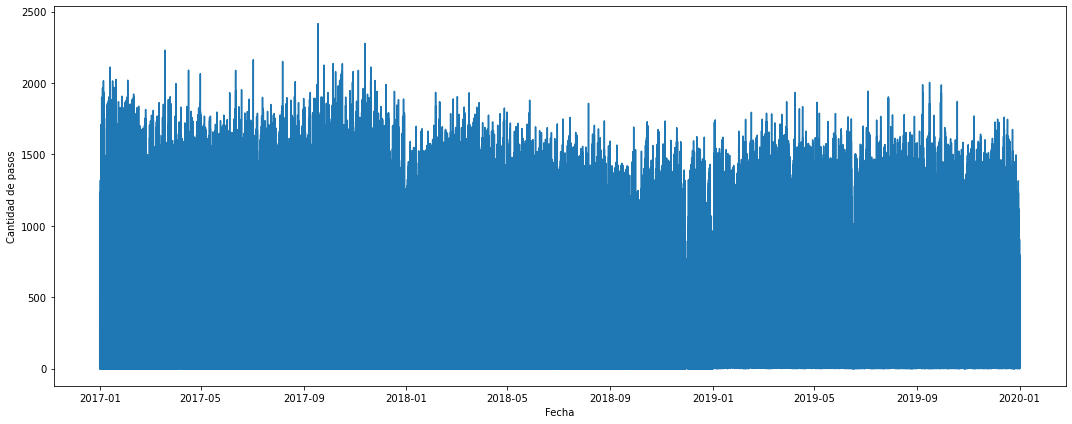

In [14]:
# Grafico de datos tal y como estan
plt.figure(figsize = (15,6))
plt.plot(df.fecha, df.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.tight_layout()
plt.show()

In [15]:
# Resampleo Diario para mejor visualizacion
diario= df.resample('D', on='fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

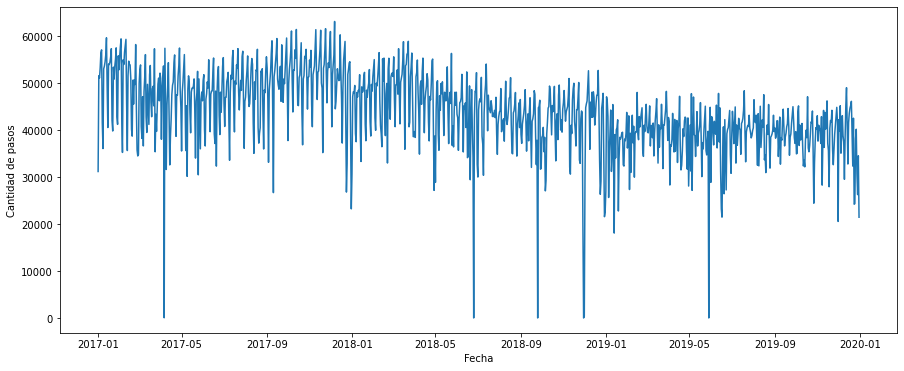

In [16]:
plt.figure(figsize=(15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()

In [17]:
print(df.isnull().sum())

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64


No tenemos datos faltantes.

Como ya analizamos previamente este set vamos a proceder a cortar los picos negativos que se observan.

Primero vamos a cortar estos datos que esten por debajo de los 15000, luego los pasaremos a nulos y haremos una interpolación con el método K nearest.

In [18]:
falta= diario.copy()
falta= diario[diario.cantidad_pasos <= 15000]
falta

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

In [19]:
diario.cantidad_pasos[diario.cantidad_pasos<= 15000]= np.nan
print(diario.isnull().sum())

cantidad_pasos    6
dtype: int64


In [20]:
diario= diario.interpolate(method='nearest', k=2)
diario.isnull().sum()

cantidad_pasos    0
dtype: int64

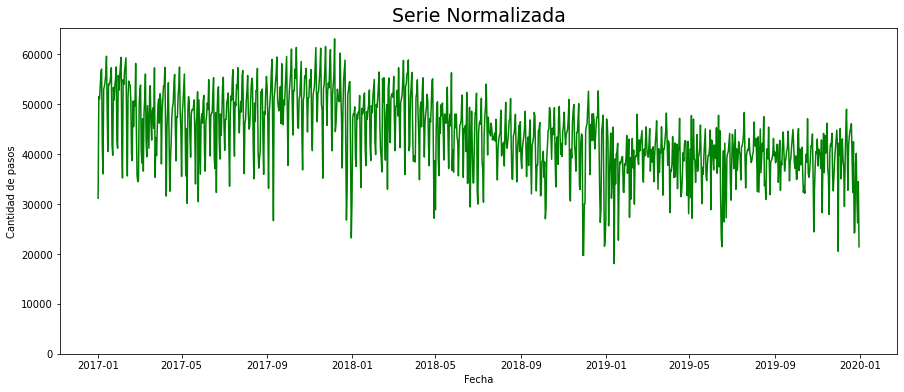

In [21]:
plt.figure(figsize=(15,6))
plt.plot(diario.index, diario.cantidad_pasos, color='green')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Serie Normalizada', size= 19)
plt.ylim(0)
plt.show()

Ahora tenemos la serie normalizada y vemos como se quitaron los picos negativos.

Estos picos negativos se dieron por diferentes causas como, paro nacional de trabajadores, manifestaciones y cortes de rutas por protestas.

## Análisis del año 2020

In [22]:
data_20 = pd.read_csv('flujo-vehicular-2020.csv', sep=',')
data20= data_20[data_20.estacion== 'ILLIA']
data20.describe(include='all')

periodo                fecha     mes        dia      dia_fecha  \
count   296053.0               296053  296053     296053  296053.000000   
unique       NaN                  366      12          7            NaN   
top          NaN  2020-02-21 00:00:00   enero  Miércoles            NaN   
freq         NaN                 1212   31057      46632            NaN   
mean      2020.0                  NaN     NaN        NaN      15.717733   
std          0.0                  NaN     NaN        NaN       8.779484   
min       2020.0                  NaN     NaN        NaN       1.000000   
25%       2020.0                  NaN     NaN        NaN       8.000000   
50%       2020.0                  NaN     NaN        NaN      16.000000   
75%       2020.0                  NaN     NaN        NaN      23.000000   
max       2020.0                  NaN     NaN        NaN      31.000000   

          hora_inicio       hora_fin estacion tipo_vehiculo forma_pago  \
count   296053.000000  296053.000000   296053        296053     296053   
unique            NaN            NaN        1            12          8   
top               NaN            NaN    ILLIA          Auto        Tag   
freq              NaN            NaN   296053        133478     135838   
mean        12.158566      12.406268      NaN           NaN        NaN   
std          6.243732       6.337303      NaN           NaN        NaN   
min          0.000000       0.000000      NaN           NaN        NaN   
25%          7.000000       8.000000      NaN           NaN        NaN   
50%         12.000000      13.000000      NaN           NaN        NaN   
75%         17.000000      18.000000      NaN           NaN        NaN   
max         23.000000      23.000000      NaN           NaN        NaN   

          observacion sentido  cantidad_pasos  
count          296053  296053   296053.000000  
unique             22       2             NaN  
top     Tag - PosPago  Centro             NaN  
freq            66258  153134             NaN  
mean              NaN     NaN       60.665192  
std               NaN     NaN      191.956546  
min               NaN     NaN        1.000000  
25%               NaN     NaN        1.000000  
50%               NaN     NaN        4.000000  
75%               NaN     NaN       20.000000  
max               NaN     NaN     3234.000000

A continuación vamos a ver los tipos y cantidad de pagos por cada categoría. (Aclaración Tag= TELEPASE)

In [23]:
print(data20['forma_pago'].unique())
print(data20.forma_pago.value_counts())

['Efectivo' 'Exento' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Violación'
 'CPP' 'Mercado Pago']
Tag                  135838
Efectivo              52374
Violación             37272
Rec.Deuda             30694
Exento                23745
Tarjeta Magnética     10899
CPP                    2913
Mercado Pago           2318
Name: forma_pago, dtype: int64


Vemos que el pago en efectivo disminuyó drásticamente para este año. Tendencia que veníamos viendo y podíamos prevenir para este año.

In [24]:
dat20 = data_20[(data_20.estacion == 'ILLIA') & (data_20.forma_pago== 'Efectivo')]
dat20

periodo                fecha        mes        dia  dia_fecha  \
52        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
53        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
134       2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
135       2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
202       2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
...          ...                  ...        ...        ...        ...   
2532216   2020.0           2020-12-24  diciembre     Jueves       24.0   
2532227   2020.0           2020-12-24  diciembre     Jueves       24.0   
2532271   2020.0           2020-12-24  diciembre     Jueves       24.0   
2532928   2020.0           2020-12-28  diciembre      Lunes       28.0   
2533497   2020.0           2020-12-30  diciembre  Miércoles       30.0   

         hora_inicio  hora_fin estacion   tipo_vehiculo forma_pago  \
52               0.0       1.0    ILLIA            Auto   Efectivo   
53               0.0       1.0    ILLIA            Auto   Efectivo   
134              1.0       2.0    ILLIA            Auto   Efectivo   
135              1.0       2.0    ILLIA            Auto   Efectivo   
202              2.0       3.0    ILLIA            Auto   Efectivo   
...              ...       ...      ...             ...        ...   
2532216         11.0      12.0    ILLIA  Pesados 6 Ejes   Efectivo   
2532227         12.0      13.0    ILLIA  Pesados 6 Ejes   Efectivo   
2532271         17.0      18.0    ILLIA  Pesados 6 Ejes   Efectivo   
2532928         12.0      13.0    ILLIA  Pesados 6 Ejes   Efectivo   
2533497         13.0      14.0    ILLIA  Pesados 6 Ejes   Efectivo   

        observacion    sentido  cantidad_pasos  
52         Efectivo     Centro           326.0  
53         Efectivo  Provincia           319.0  
134        Efectivo     Centro           199.0  
135        Efectivo  Provincia           180.0  
202        Efectivo     Centro           114.0  
...             ...        ...             ...  
2532216    Efectivo  Provincia             1.0  
2532227    Efectivo  Provincia             1.0  
2532271    Efectivo     Centro             1.0  
2532928    Efectivo  Provincia             1.0  
2533497    Efectivo  Provincia             4.0  

[52374 rows x 13 columns]

In [25]:
dat20.describe(include='all')

periodo                fecha    mes        dia     dia_fecha  \
count   52374.0                52374  52374      52374  52374.000000   
unique      NaN                  307     11          7           NaN   
top         NaN  2020-02-10 00:00:00  enero  Miércoles           NaN   
freq        NaN                  240   6536       7954           NaN   
mean     2020.0                  NaN    NaN        NaN     15.659201   
std         0.0                  NaN    NaN        NaN      8.789561   
min      2020.0                  NaN    NaN        NaN      1.000000   
25%      2020.0                  NaN    NaN        NaN      8.000000   
50%      2020.0                  NaN    NaN        NaN     16.000000   
75%      2020.0                  NaN    NaN        NaN     23.000000   
max      2020.0                  NaN    NaN        NaN     31.000000   

         hora_inicio      hora_fin estacion tipo_vehiculo forma_pago  \
count   52374.000000  52374.000000    52374         52374      52374   
unique           NaN           NaN        1            12          1   
top              NaN           NaN    ILLIA          Auto   Efectivo   
freq             NaN           NaN    52374         14609      52374   
mean       11.952324     12.102742      NaN           NaN        NaN   
std         6.476084      6.544925      NaN           NaN        NaN   
min         0.000000      0.000000      NaN           NaN        NaN   
25%         7.000000      7.000000      NaN           NaN        NaN   
50%        12.000000     12.000000      NaN           NaN        NaN   
75%        17.000000     18.000000      NaN           NaN        NaN   
max        23.000000     23.000000      NaN           NaN        NaN   

       observacion    sentido  cantidad_pasos  
count        52374      52374    52374.000000  
unique           1          2             NaN  
top       Efectivo  Provincia             NaN  
freq         52374      26748             NaN  
mean           NaN        NaN       93.221579  
std            NaN        NaN      202.295918  
min            NaN        NaN        1.000000  
25%            NaN        NaN        2.000000  
50%            NaN        NaN       11.000000  
75%            NaN        NaN       66.000000  
max            NaN        NaN     1458.000000

In [26]:
# Quitamos las columnas que no utilizaremos
dat20.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
dat20['fecha2']= pd.to_datetime(dat20.fecha)+ pd.to_timedelta(dat20.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
dat20.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
dat20.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
dat20.sort_values('fecha', inplace=True)
dat20.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
diario20 = dat20.resample('D', on='fecha').sum()
diario20

C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-26-980941af9d51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat20['fecha2']= pd.to_datetime(dat20.fecha)+ pd.to_timedelta(dat20.hora_fin, unit='h')
C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

cantidad_pasos
fecha                     
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0
...                    ...
2020-12-27          8434.0
2020-12-28         10311.0
2020-12-29         12036.0
2020-12-30         12527.0
2020-12-31          6553.0

[366 rows x 1 columns]

In [27]:
# Verificamos los datos faltantes
diario20.isnull().sum()

cantidad_pasos    0
dtype: int64

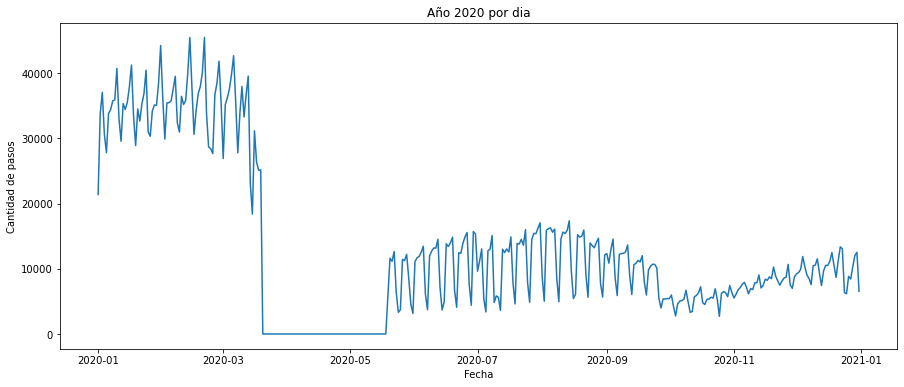

In [28]:
# Graficamos
plt.figure(figsize=(15,6))
plt.plot(diario20.index, diario20.cantidad_pasos)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Año 2020 por dia')
plt.show()

Aquí vemos el choque exógeno provocado por la cuarentena por el COVID en Argentina a partir del 20 de Marzo del 2020. Lo cual hizo que todos, a excepción de los trabajadores escenciales, pudieran salir de sus casas.

## Análisis de las formas de pago Efectivo vs Telepase (tag)

A continuación, analizaremos en el año como fue el comportamiento entre estas dos formas de pago.

Primero resamplearemos la serie por la media semanal, como veníamos trabajando anteriormente.

In [29]:
sema_20 = diario20.resample('W').mean()
print(sema_20.shape)
sema_20

(53, 1)


cantidad_pasos
fecha                     
2020-01-05    30124.600000
2020-01-12    34765.571429
2020-01-19    35259.714286
2020-01-26    34456.000000
2020-02-02    36190.714286
2020-02-09    35306.428571
2020-02-16    37351.142857
2020-02-23    36728.000000
2020-03-01    33641.000000
2020-03-08    36415.714286
2020-03-15    31827.571429
2020-03-22    15407.857143
2020-03-29        0.000000
2020-04-05        0.000000
2020-04-12        0.000000
2020-04-19        0.000000
2020-04-26        0.000000
2020-05-03        0.000000
2020-05-10        0.000000
2020-05-17        0.142857
2020-05-24     7269.000000
2020-05-31     7844.857143
2020-06-07    10070.428571
2020-06-14    10921.714286
2020-06-21    10246.714286
2020-06-28    11610.714286
2020-07-05    10534.142857
2020-07-12     8683.285714
2020-07-19    11207.000000
2020-07-26    12086.428571
2020-08-02    13204.142857
2020-08-09    13364.714286
2020-08-16    13417.285714
2020-08-23    11678.000000
2020-08-30    11842.571429
2020-09-06    11058.428571
2020-09-13    11162.428571
2020-09-20     9964.142857
2020-09-27     8741.571429
2020-10-04     4940.428571
2020-10-11     5010.428571
2020-10-18     5419.142857
2020-10-25     5246.285714
2020-11-01     6300.428571
2020-11-08     6977.142857
2020-11-15     7577.142857
2020-11-22     8740.142857
2020-11-29     8290.000000
2020-12-06     9797.142857
2020-12-13     9347.857143
2020-12-20    10511.142857
2020-12-27     9633.428571
2021-01-03    10356.750000

Ahora vamos a crear el set pero con el Telepase.

In [30]:
tele20 = data20[(data20.estacion== 'ILLIA')&(data20.forma_pago== 'Tag')]
tele20.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
62   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
63   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
64   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
65   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
66   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

    hora_fin estacion tipo_vehiculo forma_pago        observacion    sentido  \
62       1.0    ILLIA          Auto        Tag      Tag - PosPago     Centro   
63       1.0    ILLIA          Auto        Tag      Tag - PosPago  Provincia   
64       1.0    ILLIA          Auto        Tag  Tag - PosPago OCR     Centro   
65       1.0    ILLIA          Auto        Tag  Tag - PosPago OCR  Provincia   
66       1.0    ILLIA          Auto        Tag      Tag - PrePago     Centro   

    cantidad_pasos  
62           205.0  
63           141.0  
64            22.0  
65           131.0  
66             8.0

In [31]:
# Quitamos las columnas que no utilizaremos
tele20.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
tele20['fecha2']= pd.to_datetime(tele20.fecha)+ pd.to_timedelta(tele20.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
tele20.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
tele20.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
tele20.sort_values('fecha', inplace=True)
tele20.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
tele20_d = tele20.resample('D', on='fecha').sum()
tele20_d

C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-31-8af8964d2ff3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tele20['fecha2']= pd.to_datetime(tele20.fecha)+ pd.to_timedelta(tele20.hora_fin, unit='h')
C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

cantidad_pasos
fecha                     
2020-01-01         18882.0
2020-01-02         48376.0
2020-01-03         49332.0
2020-01-04         26319.0
2020-01-05         23289.0
...                    ...
2020-12-27         28595.0
2020-12-28         56794.0
2020-12-29         62086.0
2020-12-30         59620.0
2020-12-31         33155.0

[366 rows x 1 columns]

Resampleamos por la media semanal también.

In [32]:
semat_20= tele20_d.resample('W').mean()
semat_20

cantidad_pasos
fecha                     
2020-01-05    33239.600000
2020-01-12    45275.714286
2020-01-19    46034.857143
2020-01-26    45056.285714
2020-02-02    47610.142857
2020-02-09    48739.000000
2020-02-16    50148.142857
2020-02-23    50353.714286
2020-03-01    42120.142857
2020-03-08    54410.142857
2020-03-15    50522.285714
2020-03-22    26374.142857
2020-03-29     3002.857143
2020-04-05     4008.285714
2020-04-12     5819.428571
2020-04-19     8204.000000
2020-04-26     9615.285714
2020-05-03    10619.428571
2020-05-10    13500.285714
2020-05-17    15191.000000
2020-05-24    12152.571429
2020-05-31    11073.428571
2020-06-07    14476.142857
2020-06-14    15771.142857
2020-06-21    14853.857143
2020-06-28    17204.857143
2020-07-05    14711.857143
2020-07-12    12144.857143
2020-07-19    16073.428571
2020-07-26    17789.714286
2020-08-02    19161.571429
2020-08-09    19701.714286
2020-08-16    21865.000000
2020-08-23    21419.428571
2020-08-30    25374.285714
2020-09-06    27266.000000
2020-09-13    28575.571429
2020-09-20    30614.571429
2020-09-27    32279.571429
2020-10-04    36480.428571
2020-10-11    38795.428571
2020-10-18    38334.857143
2020-10-25    39595.571429
2020-11-01    43326.571429
2020-11-08    45851.285714
2020-11-15    47802.857143
2020-11-22    49934.571429
2020-11-29    46308.285714
2020-12-06    53699.571429
2020-12-13    46552.428571
2020-12-20    56169.857143
2020-12-27    46661.714286
2021-01-03    52913.750000

Ahora vamos a graficar las dos series para comparar los comportamientos de las tendencias.

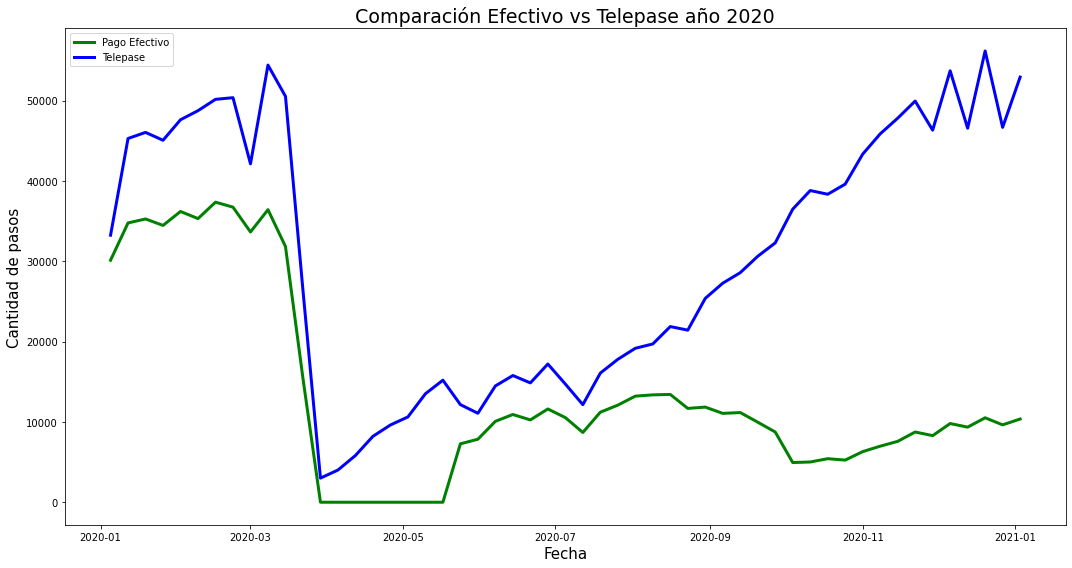

In [33]:
plt.figure(figsize=(15,8))
plt.plot(sema_20.index, sema_20.cantidad_pasos, lw=3, color='green', label='Pago Efectivo')
plt.plot(semat_20.index, semat_20.cantidad_pasos, lw=3, color='blue', label='Telepase')
plt.title('Comparación Efectivo vs Telepase año 2020', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

Vemos que hay una diferencia en la fecha que inició la cuarentena. Esto lo podemos asociar a que los trabajadores escenciales hicieron uso del Telepase por los beneficios que este brinda (Generalmente las personas que pasan todos los dias utilizan este medio de pago) y a su vez los protocolos por el COVID no permitían el contacto con el dinero. 
De igual manera estamos viendo que solamente una semana el Telepase se mantuvo en su punto más bajo, y después vemos que fue creciendo a diferencia del pago en Efectivo.

Como hicimos en el proyecto anterior, volvemos a comparar la estación Illia con la estación Avellaneda para ver el comportamiento en este tiempo.

In [34]:
ave= data_20[(data_20.estacion== 'AVELLANEDA')&(data_20.forma_pago=='Efectivo')]
ave

periodo                fecha        mes        dia  dia_fecha  \
11        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
12        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
100       2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
101       2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
170       2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
...          ...                  ...        ...        ...        ...   
2391590   2020.0           2020-12-30  diciembre  Miércoles       30.0   
2391599   2020.0           2020-12-30  diciembre  Miércoles       30.0   
2391605   2020.0           2020-12-30  diciembre  Miércoles       30.0   
2391613   2020.0           2020-12-31  diciembre     Jueves       31.0   
2391629   2020.0           2020-12-31  diciembre     Jueves       31.0   

         hora_inicio  hora_fin    estacion   tipo_vehiculo forma_pago  \
11               0.0       1.0  AVELLANEDA            Auto   Efectivo   
12               0.0       1.0  AVELLANEDA            Auto   Efectivo   
100              1.0       2.0  AVELLANEDA            Auto   Efectivo   
101              1.0       2.0  AVELLANEDA            Auto   Efectivo   
170              2.0       3.0  AVELLANEDA            Auto   Efectivo   
...              ...       ...         ...             ...        ...   
2391590         20.0      21.0  AVELLANEDA  Pesados 6 Ejes   Efectivo   
2391599         22.0      23.0  AVELLANEDA  Pesados 6 Ejes   Efectivo   
2391605         23.0       0.0  AVELLANEDA  Pesados 6 Ejes   Efectivo   
2391613          7.0       8.0  AVELLANEDA  Pesados 6 Ejes   Efectivo   
2391629         11.0      12.0  AVELLANEDA  Pesados 6 Ejes   Efectivo   

        observacion    sentido  cantidad_pasos  
11         Efectivo     Centro      542.000000  
12         Efectivo  Provincia      596.000000  
100        Efectivo     Centro      255.000000  
101        Efectivo  Provincia      373.000000  
170        Efectivo     Centro      128.000000  
...             ...        ...             ...  
2391590    Efectivo  Provincia        0.991579  
2391599    Efectivo     Centro        0.991579  
2391605    Efectivo     Centro        0.991579  
2391613    Efectivo     Centro        0.991579  
2391629    Efectivo     Centro        0.991579  

[86578 rows x 13 columns]

In [35]:
# Quitamos las columnas que no utilizaremos
ave.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
ave['fecha2']= pd.to_datetime(ave.fecha)+ pd.to_timedelta(ave.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
ave.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
ave.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
ave.sort_values('fecha', inplace=True)
ave.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
ave = ave.resample('D', on='fecha').sum()
ave

C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-35-cdaae179c384>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ave['fecha2']= pd.to_datetime(ave.fecha)+ pd.to_timedelta(ave.hora_fin, unit='h')
C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

cantidad_pasos
fecha                     
2020-01-01    42236.000000
2020-01-02    55496.000000
2020-01-03    63279.000000
2020-01-04    54679.000000
2020-01-05    45192.000000
...                    ...
2020-12-27    15424.009922
2020-12-28    19751.260278
2020-12-29    19999.155005
2020-12-30    23350.691716
2020-12-31    13441.843684

[366 rows x 1 columns]

In [36]:
# Resampleo por media semanal
ave = ave.resample('W').mean()
ave.shape

(53, 1)

In [37]:
avet = data_20[(data_20.estacion=='AVELLANEDA')&(data_20.forma_pago== 'Tag')]
avet

periodo                fecha        mes        dia  dia_fecha  \
21        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
22        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
23        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
24        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
25        2020.0  2020-01-01 00:00:00      enero  Miércoles        1.0   
...          ...                  ...        ...        ...        ...   
2391656   2020.0           2020-12-31  diciembre     Jueves       31.0   
2391657   2020.0           2020-12-31  diciembre     Jueves       31.0   
2391658   2020.0           2020-12-31  diciembre     Jueves       31.0   
2391659   2020.0           2020-12-31  diciembre     Jueves       31.0   
2391660   2020.0           2020-12-31  diciembre     Jueves       31.0   

         hora_inicio  hora_fin    estacion   tipo_vehiculo forma_pago  \
21               0.0       1.0  AVELLANEDA            Auto        Tag   
22               0.0       1.0  AVELLANEDA            Auto        Tag   
23               0.0       1.0  AVELLANEDA            Auto        Tag   
24               0.0       1.0  AVELLANEDA            Auto        Tag   
25               0.0       1.0  AVELLANEDA            Auto        Tag   
...              ...       ...         ...             ...        ...   
2391656         19.0      20.0  AVELLANEDA  Pesados 6 Ejes        Tag   
2391657         19.0      20.0  AVELLANEDA  Pesados 6 Ejes        Tag   
2391658         20.0      21.0  AVELLANEDA  Pesados 6 Ejes        Tag   
2391659         20.0      21.0  AVELLANEDA  Pesados 6 Ejes        Tag   
2391660         21.0      22.0  AVELLANEDA  Pesados 6 Ejes        Tag   

               observacion    sentido  cantidad_pasos  
21           Tag - PosPago     Centro      361.000000  
22           Tag - PosPago  Provincia      248.000000  
23       Tag - PosPago OCR     Centro       55.000000  
24       Tag - PosPago OCR  Provincia      194.000000  
25           Tag - PrePago     Centro        8.000000  
...                    ...        ...             ...  
2391656      Tag - PosPago     Centro        0.991579  
2391657      Tag - PosPago  Provincia        1.983158  
2391658      Tag - PosPago     Centro        2.974737  
2391659  Tag - PosPago OCR     Centro        0.991579  
2391660      Tag - PosPago  Provincia        0.991579  

[270623 rows x 13 columns]

In [38]:
# Quitamos las columnas que no utilizaremos
avet.drop(columns=['periodo', 'hora_inicio', 'estacion', 'tipo_vehiculo', 'forma_pago', 'observacion', 'sentido', 'dia_fecha'], inplace=True)
# Pasamos la columna de fecha a formato de datetime y le ponemos hora_fin como hora
avet['fecha2']= pd.to_datetime(avet.fecha)+ pd.to_timedelta(avet.hora_fin, unit='h')
# Quitamos las columnas fecha y hora_fin
avet.drop(columns=['fecha', 'hora_fin'], inplace=True)
# Cambiamos el nombre de fecha2 por fecha
avet.rename(columns={'fecha2':'fecha'}, inplace=True)
# Ordenamos la fecha
avet.sort_values('fecha', inplace=True)
avet.reset_index(drop=True, inplace=True)
# Y por ultimo resampleamos por dia
avet = avet.resample('D', on='fecha').sum()
avet

C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-38-4713ebe217d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avet['fecha2']= pd.to_datetime(avet.fecha)+ pd.to_timedelta(avet.hora_fin, unit='h')
C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

cantidad_pasos
fecha                     
2020-01-01    34472.000000
2020-01-02    66620.000000
2020-01-03    70394.000000
2020-01-04    45360.000000
2020-01-05    36395.000000
...                    ...
2020-12-27    57127.835655
2020-12-28   104134.625391
2020-12-29   106664.143187
2020-12-30   113765.831330
2020-12-31    77352.079073

[366 rows x 1 columns]

In [39]:
# Resampleo por la media semanal
avet= avet.resample('W').mean()
avet.shape

(53, 1)

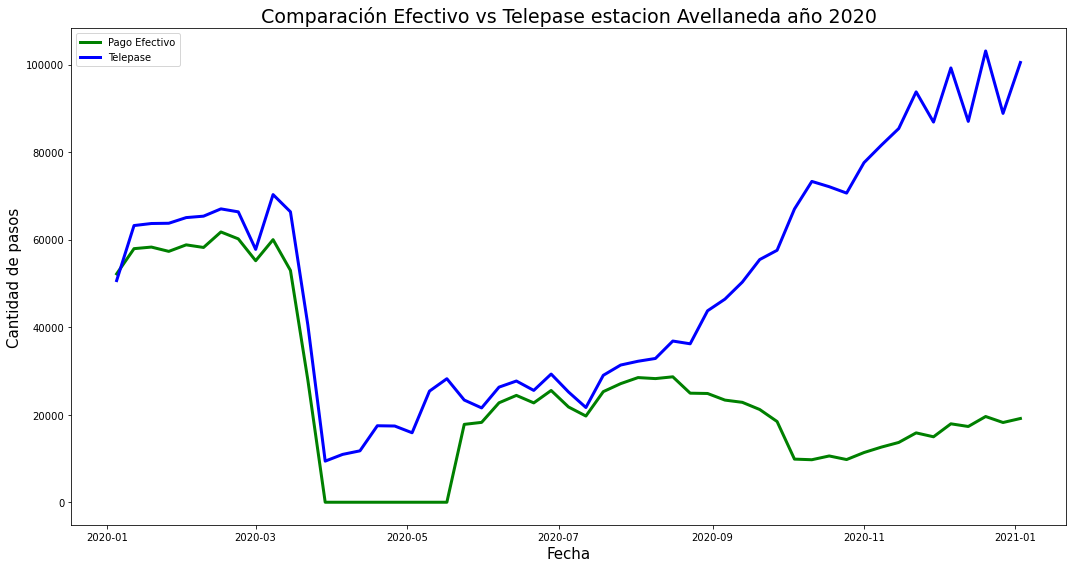

In [40]:
# Grafica
plt.figure(figsize=(15,8))
plt.plot(ave.index, ave.cantidad_pasos, lw=3, color='green', label='Pago Efectivo')
plt.plot(avet.index, avet.cantidad_pasos, lw=3, color='blue', label='Telepase')
plt.title('Comparación Efectivo vs Telepase estacion Avellaneda año 2020', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

Se observa la misma tendencia en esta estación. Vemos como el pago en Efectivo es nulo en el período de Marzo-Junio, tiempo que estuvo el aislamiento obligatorio. Y observamos que el telepase disminuyó la frecuencia pero no llegó nunca al 0.

Ahora si vamos a unir nuestros set de datos y comenzaremos a trabajar con todos los años.

In [41]:
dias = pd.concat([diario, diario20])

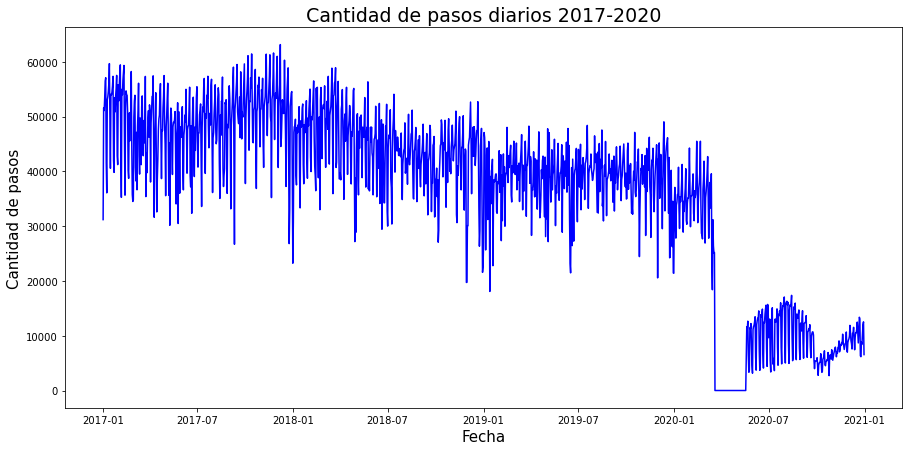

In [42]:
plt.figure(figsize=(15,7))
plt.plot(dias.index, dias.cantidad_pasos, color= 'blue')
plt.title('Cantidad de pasos diarios 2017-2020', size=19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.show()

## Prueba de Dickey Fuller.

Analizaremos la serie de tiempo con la prueba Dickey Fuller y veremos con qué estamos tratando.

In [43]:
from statsmodels.tsa.stattools import adfuller

xx = dias.cantidad_pasos
result = adfuller(xx)
print("Adf: ", result[0])
print('p-value: ', result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Adf:  -0.9205438968209825
p-value:  0.7811317586249513
Critical Values: 
	1%: -3.435
	5%: -2.864
	10%: -2.568


Vemos que la prueba de Dickey Fuller nos da un resultado -0.92, lo cual nos indica que nuestra serie no posee una raíz unitaria y es una serie estacionaria. La estructura de la serie no depende del tiempo.

A contianuación, crearemos una nueva variable que le indique al modelo cuando se produjo el choque exógeno (La cuarentena obligatoria), creando una nueva variable llamada Cuarentena y que nos indique, cuando los pases  fueron inferiores a 100 sea 0, sino que sea 1.

In [44]:
Cuarentena = []
for x in dias['cantidad_pasos']:
    if x < 100:
        x = 0
    else:
        x = 1
    
    Cuarentena.append(x)

print(len(Cuarentena))
dias.shape

1461


(1461, 1)

Unimos la variable exógena a nuestro set semanal.

In [45]:
dias['exog'] = Cuarentena
# Verificamos las semanas que tomó.
ss = dias[(dias.exog == 0)]
ss.shape

(60, 2)

Bien, ahora tenemos señalizado el choque exógeno que ocurrió en el año 2020, le sumaré al modelo esta variable para que tenga esta información valiosa, considero, a la hora de predecir.

## Autocorrelacion

In [46]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

In [47]:
nlags= 52 * 3
autoc= acf(dias.cantidad_pasos, nlags= nlags, fft=False)
autoc.shape 

(157,)

Text(0.5, 0, 'lag')

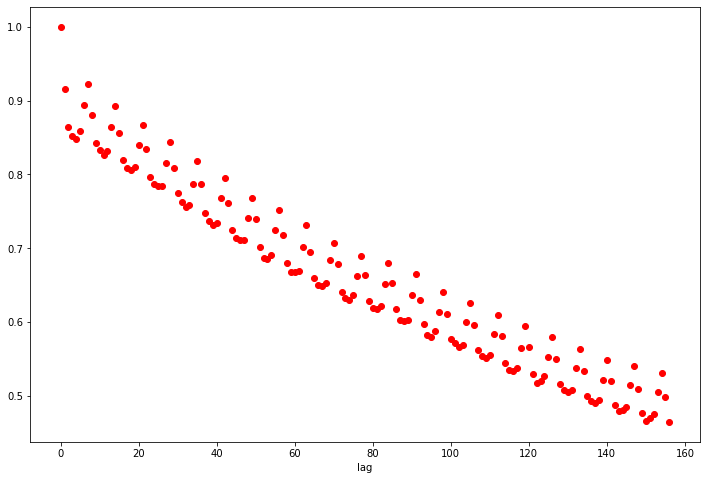

In [48]:
plt.figure(figsize = (12,8))
plt.scatter(np.arange(nlags+1), autoc,color='red')
plt.xlabel('lag')

Probamos diferentes valores de lags y nos quedamos con 52 *3 ya que a partir de aquí comenzaban los errores para graficar.

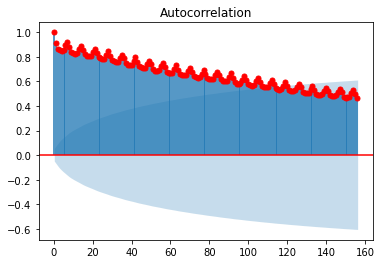

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dias.cantidad_pasos, lags = nlags, color='red')
plt.show()

Tenemos un rezago entre 100 y 110. Para dejar más claro este gráfico obsevamos los picos que se forman, cada pico nos representa una semana, lo cual podemos ver que tenemos 16 semanas por fuera del intervalo de confianza.

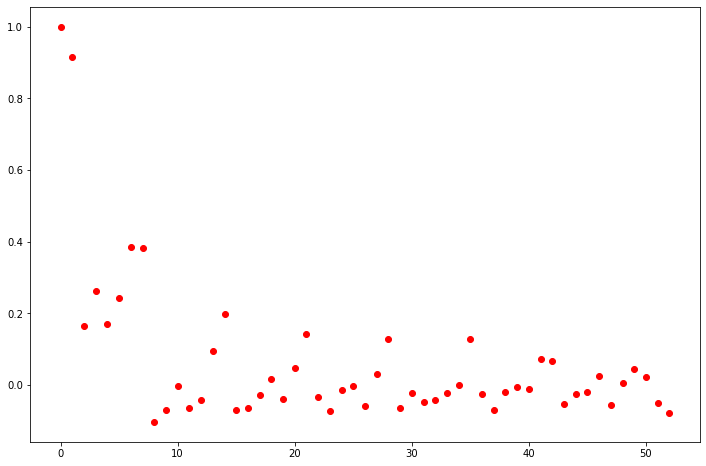

In [50]:
Nlags= 52
pautoc= pacf(dias.cantidad_pasos, nlags= Nlags)
pautoc.shape

plt.figure(figsize=(12,8))
plt.scatter(np.arange(Nlags+1), pautoc, color='red')
plt.show()

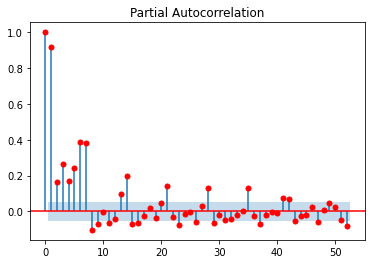

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dias.cantidad_pasos, lags = Nlags, color='red')
plt.show()

La autocorrelación parcial nos da como resultado que nuestra serie tendría un proceso Autoregresivo de 8.

## Producción de modelos.

Comenzaremos utilizando el mejor modelo del proyecto pasado, un Arima One-Step, y veremos si podemos mejorar el RMSE con nuevos modelos.

Como primer medida, vamos a realizar una predicción del último trimestre del 2020 para probar hiperparámetros y luego pasaremos al año 2021.

Recordamos los parámetros.

p = La p es el orden del modelo autorregresivo.

d = El grado de diferenciación.

q = Es el orden del proceso de la media movil.


In [52]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose

Definimos las variables, la variable "exog" es la que va a indicarle al modelo que ahí pasó el choque exógeno de la cuarentena.

In [53]:
y = dias.cantidad_pasos
exog = dias.exog

In [54]:
d=range(0,3)
p=q=range(7,16)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x {}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(7, 0, 8) x (7, 0, 8, 12)
SARIMAX:(7, 0, 8) x (7, 0, 9, 12)
SARIMAX:(7, 0, 9) x (7, 0, 10, 12)
SARIMAX:(7, 0, 9) x (7, 0, 11, 12)


Producimos el modelo, comenzamos con los parámetros del proyecto anterior (10, 1, 8) * (10, 1, 8, 12) y luego analizamos y probamos nuevos valores.

In [55]:
model1 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

resultado1 = model1.fit()

print(resultado1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                      cantidad_pasos   No. Observations:                 1461
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood              -14526.335
Date:                             Tue, 16 Mar 2021   AIC                          29060.670
Time:                                     09:05:12   BIC                          29081.796
Sample:                                 01-01-2017   HQIC                         29068.553
                                      - 12-31-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5697      0.023     24.748      0.000       0.525       0.615
ar.S.L7        0.9925      

Comprobamos el comportamiento del modelo con la variable exógena antes creada y luego comparamos si teníamos una ganancia, pero el resultado no fue el esperado, por lo cual se trabaja el modelo sin la variable exógena.

Probamos distintos parámetros que no se dejan documentados, llegamos a un buen modelo benchmar con los parámetros antes establecidos.

[]

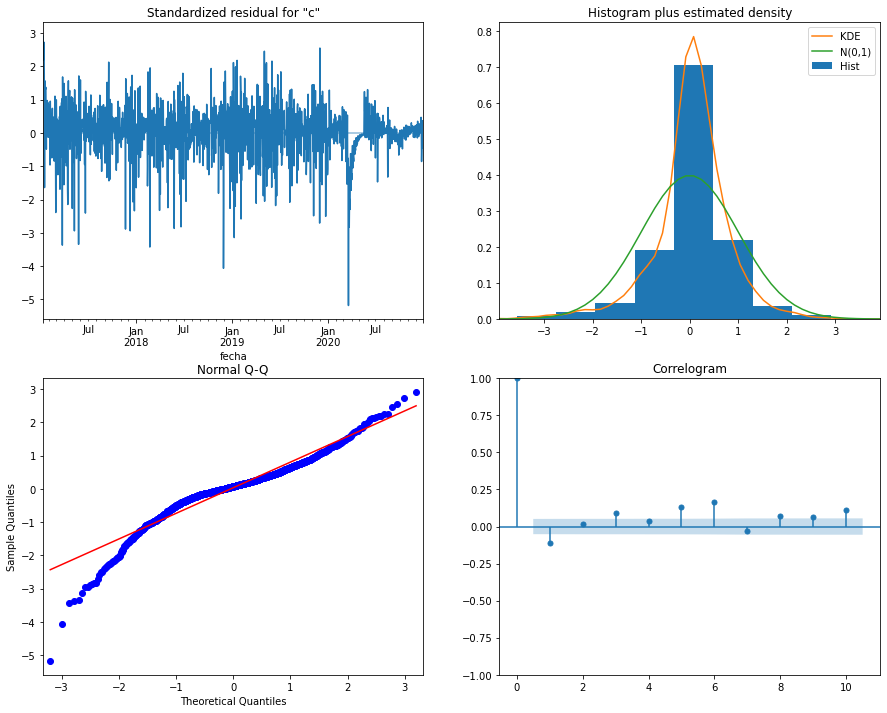

In [56]:
resultado1.plot_diagnostics(figsize=(15,12))
plt.plot()

Aquí desglozamos el modelo. Podemos ver en el primer gráfico que el residuo tiene la media en 0, buen indicador de que el modelo funciona correctamente. En el segundo gráfico vemos la distribución del residuo, donde tanto como para N 0,1 y KDE. En el tercero, vemos que los errores tienen una relación lineal, otro buen concepto del modelo que funciona correctamente. Y por último vemos el Correlograma, el cual vemos que un solo rezago esta por fuera de la sombra, es decir que el error no tiene una correlación con versiones rezagadas de sí mismo.

A continuación vamos a ver el comportamiento con el último trimestre del año 2020 y luego la predicción de este modelo Benchmark.

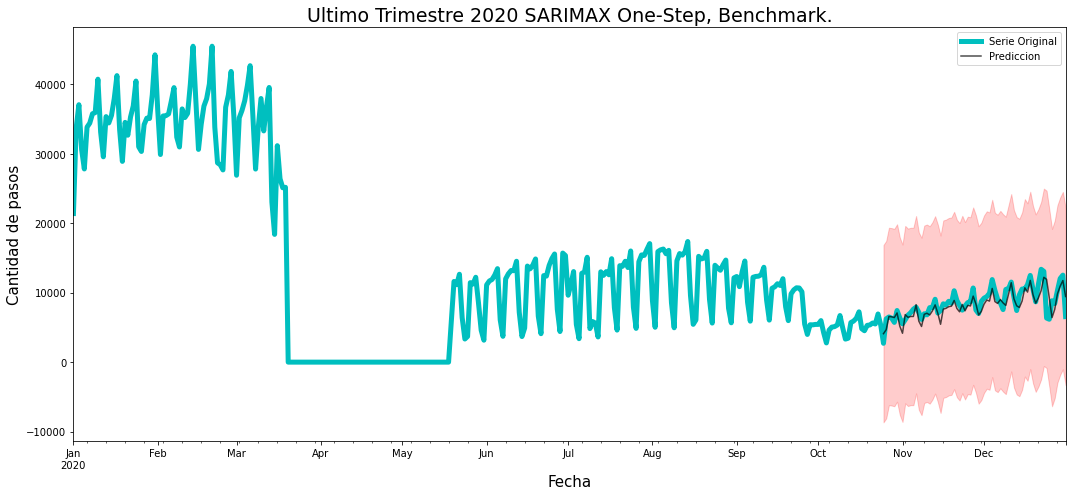

In [57]:
pred1 = resultado1.get_prediction(start=datetime.datetime(2020,10,25), dynamic=False)
c_pred1 = pred1.conf_int()
ax = y['2020':].plot(label='Serie Original',color='c',lw = 5,figsize=(15,7))

pred1.predicted_mean.plot(ax=ax, label='Prediccion', alpha=0.7, color='Black')

ax.fill_between(c_pred1.index,
                c_pred1.iloc[:, 0],
                c_pred1.iloc[:, 1], color='red', alpha=0.2)
plt.title("Ultimo Trimestre 2020 SARIMAX One-Step, Benchmark.", fontsize=19)
plt.xlabel('Fecha',size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

Vemos que la linea negra, que es la predicción, se comporta de manera correcta. Pasaremos a ver el RMSE.

In [58]:
y_forecasted1 = pred1.predicted_mean
y_truth = y['2020-10-25':]

rmse1 = np.sqrt(mean_squared_error(y_truth, y_forecasted1))
print('RMSE Benchmark: ', rmse1)

RMSE Benchmark:  1358.1373154741548


Pusimos en producción nuestro mejor modelo del proyecto pasado el SARIMAX One-Step, con la diferencia que esta vez teníamos el conocimiento de que en el año 2020 se produjo un choque exógeno lo cual nos dejó como resultado datos en 0, también una disminución considerable en los números en cuanto a años anteriores y no podemos dejar afuera el hecho de que la migración de pago en Efectivo a Telepase juega un importante rol. LLegamos a un RMSE de 1358.13 el cual lo tomamos como punto de partida para lo que sigue.

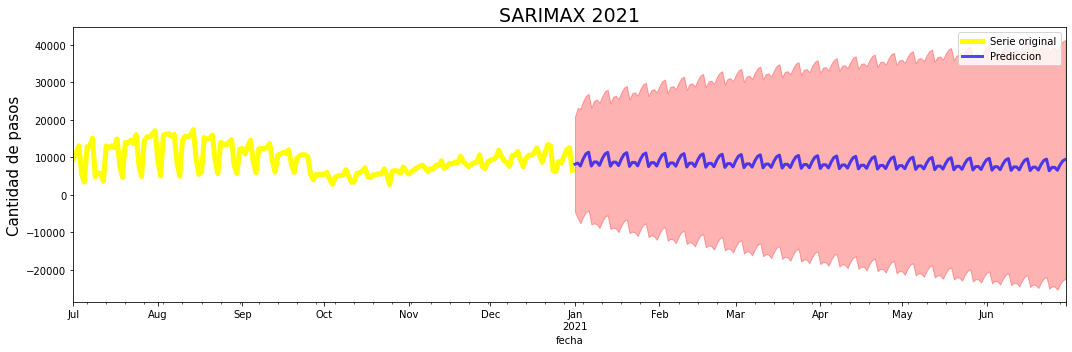

In [59]:
pred = resultado1.get_forecast(steps= datetime.datetime(2021, 6, 30), dynamic= False)
c_pred= pred.conf_int()

ax= y['2020-07-01':].plot(label='Serie original', color='yellow', lw=5, figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', color='Blue', lw=3, alpha=0.7)

ax.fill_between(c_pred.index, c_pred.iloc[:,0], c_pred.iloc[:,1], color='red', alpha=0.3)

plt.title('SARIMAX 2021', size=19)
plt.ylabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

La predicción de nuestro modelo Benchmark nos deja como conclusión de que en el 2021, el pago en Efectivo va a tener un flujo constante entre los 5 y 10 mil pases diarios. Lo que sí varía es la zona de confianza del modelo, podemos ver que incrementa con el tiempo, algo lógico en estos modelos que son mejores predictores en el corto tiempo.

## Prophet.

Empezamos esta parte implementando la librería de código abierto de Facebook, Prophet.

Prophet es un procedimiento para pronosticar datos de series de tiempo basado en un modelo aditivo donde las tendencias no lineales se ajustan a la estacionalidad anual, semanal y diaria, más los efectos de las vacaciones. Funciona mejor con series de tiempo que tienen fuertes efectos estacionales y varias temporadas de datos históricos. Prophet es robusto ante los datos faltantes y los cambios de tendencia, y normalmente maneja bien los outliers.

Para trabajar con esta librería, debemos establece dos columnas, la Fecha como "ds" y la cantidad de pasos como "y", por lo que modificaremos el dataset que veníamos utilizando.

In [60]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [61]:
diarioP = dias.copy()
diarioP = diarioP.drop('exog', axis=1)
diarioP= diarioP.reset_index()
diarioP= diarioP.rename(columns={'fecha': 'ds',
                    'cantidad_pasos': 'y'})
diarioP

ds        y
0    2017-01-01  31183.0
1    2017-01-02  51568.0
2    2017-01-03  51093.0
3    2017-01-04  53332.0
4    2017-01-05  56486.0
...         ...      ...
1456 2020-12-27   8434.0
1457 2020-12-28  10311.0
1458 2020-12-29  12036.0
1459 2020-12-30  12527.0
1460 2020-12-31   6553.0

[1461 rows x 2 columns]

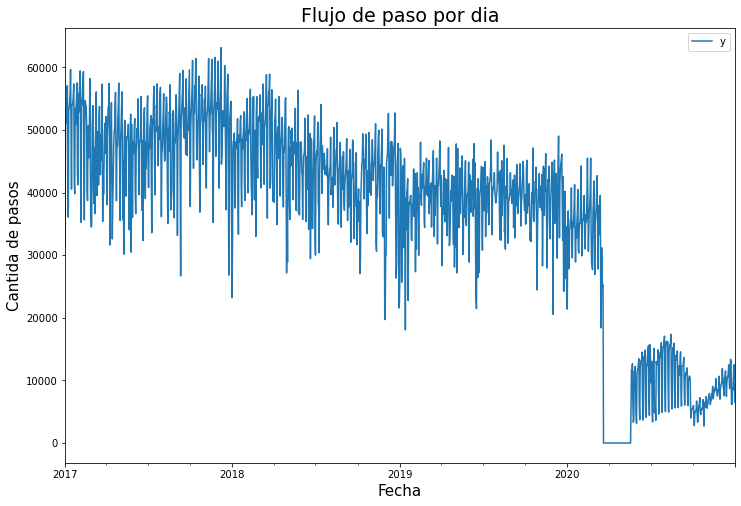

In [62]:
ax = diarioP.set_index('ds').plot(figsize=(12,8))

plt.title('Flujo de paso por dia', size= 19)
plt.xlabel('Fecha', size=15)
plt.ylabel('Cantida de pasos', size=15)

plt.show()

La siguiente función es para optimizar el parámetro changepoint. Decidí dejarla comentada porque en esta ocasión obtuve mejores resultados trabajando con resultados buscados a mano.

In [63]:
# def optimizar_changepoint (data, initial_param, epoch):
#     MSE= {}
#     changepoint= initial_param

#     for i in range(epoch):
#         profeta = Prophet(changepoint_prior_scale= changepoint)
#         profeta.fit(data)
#         forecaste = profeta.make_future_dataframe(periods=0, freq='W')
#         forecaste= profeta.predict(forecaste)
#         y_true= data['y']
#         y_pred= forecaste['yhat']
#         error= np.sqrt(mean_squared_error(y_true, y_pred))
#         MSE[changepoint]= error
#         changepoint+= 0.1

#     optim=min(list(MSE.values()))
#     for key, value in MSE.items():
#         if optim == value:
#             k= key
#             print('Changepoint Optimo: ', key, ' el MSE es: ', value)
#     return k

In [64]:
# changepoint= optimizar_changepoint(diarioP,0.5, 200)

Definimos el modelo y utilizamos el Multiplicativo para esta ocasión, se probó el modelo aditivo para no dejar al azar nada pero se llego a mejores resultados de esta forma.

In [65]:
ProfetM = Prophet(seasonality_mode='multiplicative', interval_width=0.95, changepoint_prior_scale= 0.9)
ProfetM.fit(diarioP)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
future1 = ProfetM.make_future_dataframe(periods=365, freq='D')
future1.head()

ds
0 2017-01-01
1 2017-01-02
2 2017-01-03
3 2017-01-04
4 2017-01-05

In [67]:
future1.tail()

ds
1821 2021-12-27
1822 2021-12-28
1823 2021-12-29
1824 2021-12-30
1825 2021-12-31

In [68]:
y_fores1 = ProfetM.predict(future1)
y_fores1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds          yhat    yhat_lower    yhat_upper
0 2017-01-01  41734.910747  31509.094006  51981.256537
1 2017-01-02  49475.606347  38688.995711  59793.393845
2 2017-01-03  50557.995212  40166.347185  60009.750661
3 2017-01-04  52567.929559  41941.134457  63150.414574
4 2017-01-05  53960.751396  43974.345502  64425.758003

In [69]:
y_fores1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat     yhat_lower     yhat_upper
1821 2021-12-27  2630.335130 -100031.321886   98840.478852
1822 2021-12-28  2669.468582 -103018.335052  102964.102318
1823 2021-12-29  2754.643601 -110540.751294  108826.427872
1824 2021-12-30  2807.805637 -110119.062953  108132.649172
1825 2021-12-31  2911.794473 -118356.105362  113324.037488

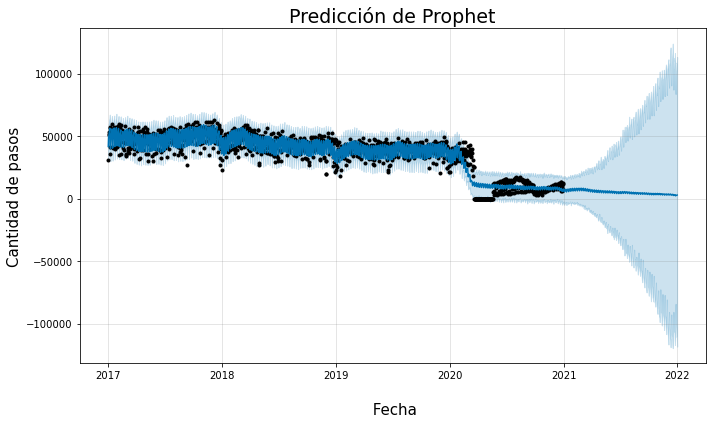

In [70]:
fig1 = ProfetM.plot(y_fores1)
plt.title("Predicción de Prophet", fontsize=19)
plt.xlabel('\n Fecha', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tight_layout()
plt.show()

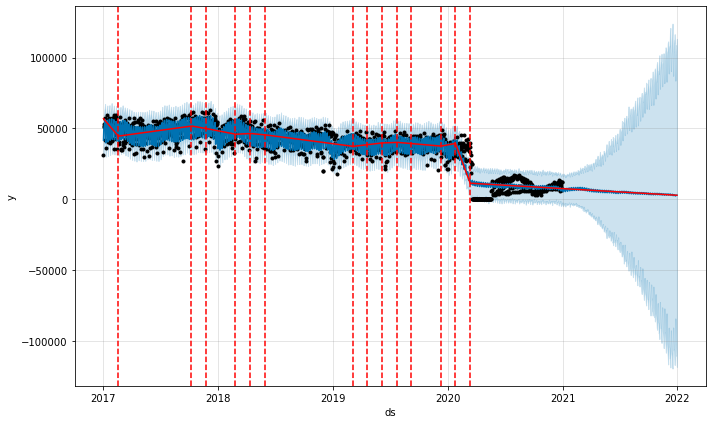

In [71]:
from fbprophet.plot import add_changepoints_to_plot
cambio_tend = ProfetM.plot(y_fores1)
a= add_changepoints_to_plot(cambio_tend.gca(), ProfetM, y_fores1)

Gráfico:

Los puntos negros son los datos analizados por el modelo.

La línea azul es la predicción realizada.

La zona azul, es el intervalo de incertidumbre del modelo.

Y en el segundo gráfico, las lineas punteadas rojas son los cambios de tendencia y la linea roja es la tendencia, los cuales podemos observar que son durante las vacaciones de verano e invierno. También podemos sacar de aquí es que para el año 2020 cuando se acerca a la fecha de la pandemia no capta más cambios.

El análisis que hacemos es que el modelo toma casi todos los datos dentro del intervalo de incertidumbre, por lo que sacamos que el modelo estudia correctamente los datos. Podemos ver como la forma de pago en efectivo sigue su camino a la baja y tiende a desaparecer en el futuro.

C:\Users\Nico\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\Nico\anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


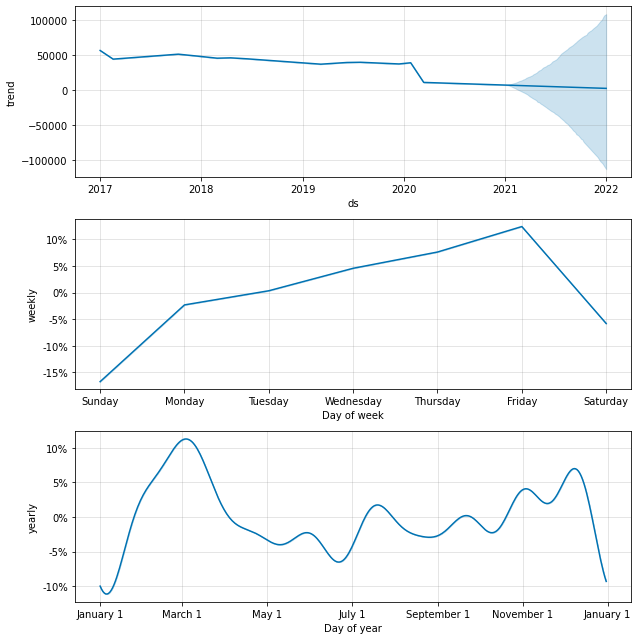

In [72]:
ProfetM.plot_components(y_fores1)
plt.show()

En este gráfico vemos la tendencia en primer lugar.

El segundo gráfico vemos la tendencia semanal, donde podemos ver que los Viernes son los días con mas flujo vehícular, siendo el Domingo el de menos cantidad de pasos.

Y por último vemos el flujo anual.

In [73]:
y_fores1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'weekly', 'weekly_lower', 'weekly_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'additive_terms',
       'additive_terms_lower', 'additive_terms_upper', 'yhat'],
      dtype='object')

Creamos el dataset del Prophet con la predicción del año 2020 para comprobar el comportamiento.

In [74]:
profet20 = y_fores1[(y_fores1.ds >= '2020-10-25')&(y_fores1.ds <= '2020-12-31')]
profet20.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper", "weekly", "weekly_lower",
                       "weekly_upper"], inplace= True)
profet20.rename(columns={'ds': 'fecha', 'yhat': 'cantidad_pasos'}, inplace=True)
profet20 = profet20.set_index('fecha')
profet20.tail()

C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


cantidad_pasos
fecha                     
2020-12-27     5832.455572
2020-12-28     6850.744968
2020-12-29     6980.042635
2020-12-30     7233.091117
2020-12-31     7403.317413

In [75]:
y_pred= profet20.cantidad_pasos['2020-10-25': '2020-12-31']
y_truth = y['2020-10-25':'2020-12-31']

rmse = np.sqrt(mean_squared_error(y_pred,y_truth))
print('RMSE para Prophet: ', rmse)

RMSE para Prophet:  2219.8743600103094


Llegado a este punto, predijimos el año 2020 con ambos modelos, y nuestro modelo benchmark SARIMAX One-Step es ampliamente suprerior en cuanto al Prophet. 

A continuación vamos a comparar las predicciones.

In [76]:
pred = resultado1.get_prediction(start=datetime.datetime(2020,10,25), dynamic=False)
sarimax20 = pred.predicted_mean
sarimax20 = pd.DataFrame(sarimax20)

sarimax20.rename(columns={'predicted_mean': 'cantidad_pasos'}, inplace=True)

sarimax20= sarimax20.set_index(sarimax20.index)

sarimax20.head()

cantidad_pasos
fecha                     
2020-10-25     4095.091877
2020-10-26     4674.343683
2020-10-27     6577.626774
2020-10-28     6523.555975
2020-10-29     6420.474267

In [77]:
ygraf= dias[(dias.index >= '2020-07-01') & (dias.index <= '2020-12-31')]
ygraf= ygraf.drop('exog', axis=1)
ygraf

cantidad_pasos
fecha                     
2020-07-01          9632.0
2020-07-02         11203.0
2020-07-03         13041.0
2020-07-04          5436.0
2020-07-05          3376.0
...                    ...
2020-12-27          8434.0
2020-12-28         10311.0
2020-12-29         12036.0
2020-12-30         12527.0
2020-12-31          6553.0

[184 rows x 1 columns]

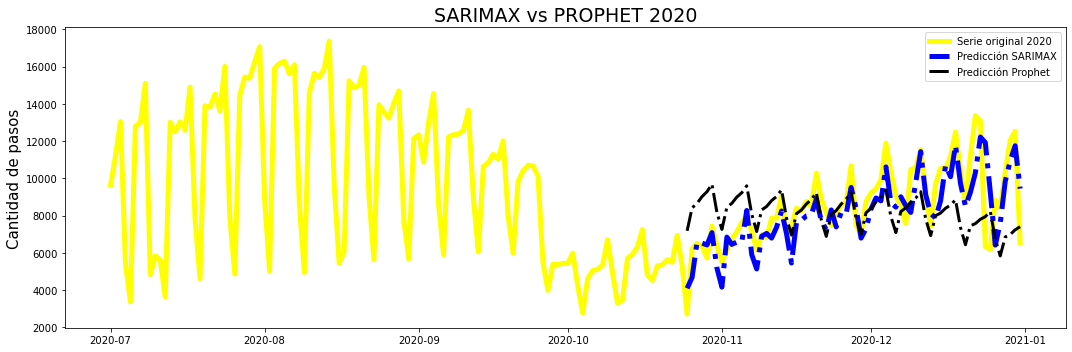

In [78]:
plt.figure(figsize=(15,5))

plt.plot(ygraf.index, ygraf.cantidad_pasos, color='yellow', lw=5, label='Serie original 2020')
plt.plot(sarimax20.index, sarimax20.cantidad_pasos,'-.' ,color='blue', lw=5 , label='Predicción SARIMAX')
plt.plot(profet20.index, profet20.cantidad_pasos,'-.', color='black', lw=3, label='Predicción Prophet')

plt.title('SARIMAX vs PROPHET 2020', size=19)
plt.ylabel('Fecha', size=15)
plt.ylabel('Cantidad de pasos', size=15)
plt.legend()
plt.tight_layout()
plt.show()

Vemos que para el 2020 el SARIMAX que elegimos como modelo Benchmark funciona mejor que el Prophet en este caso.
Podríamos deducir que el modelo Prophet le dió mucho peso a la cuarentena y la predicción tendió ir a la baja.

Ahora pasemos a ver como se comportan ambos para el primer semestre del año 2021.

In [79]:
profet21 = y_fores1[(y_fores1.ds >= '2021-01-01')&(y_fores1.ds <= '2021-06-30')]
profet21.drop(columns=["trend", "yhat_lower", "yhat_upper",
                       "trend_lower", "trend_upper", "additive_terms",
                       "additive_terms_lower", "additive_terms_upper",
                       "yearly", "yearly_lower", "yearly_upper", 
                       "multiplicative_terms", "multiplicative_terms_lower", 
                       "multiplicative_terms_upper", "weekly", "weekly_lower",
                       "weekly_upper"], inplace= True)
profet21.rename(columns={'ds': 'fecha', 'yhat': 'cantidad_pasos'}, inplace=True)
profet21 = profet21.set_index('fecha')
profet21.tail()

C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Nico\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


cantidad_pasos
fecha                     
2021-06-26     4631.384161
2021-06-27     4059.934003
2021-06-28     4819.609309
2021-06-29     4963.911674
2021-06-30     5190.911155

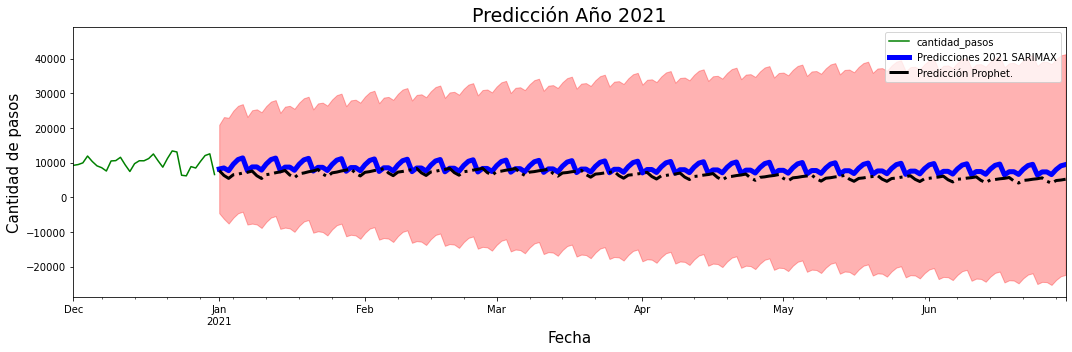

In [106]:
pred_f = resultado1.get_forecast(steps=datetime.datetime(2021,6,30))
c_predf = pred_f.conf_int()

ax = diario20.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_f.predicted_mean.plot(ax=ax, label='Predicciones 2021 SARIMAX', color='blue', lw=5)
ax.fill_between(c_predf.index,
                c_predf.iloc[:, 0],
                c_predf.iloc[:, 1], color='red', alpha=.3)
plt.plot(profet21.index, profet21.cantidad_pasos,'-.', color='black', lw=3, label= 'Predicción Prophet.')
plt.title("Predicción Año 2021", fontsize=19)
ax.set_xlabel('Fecha', size=15)
ax.set_ylabel('Cantidad de pasos', size=15)
plt.xlim(datetime.datetime(2020,12,1), datetime.datetime(2021,6,30))
plt.legend()
plt.tight_layout()
plt.show()

Las predicciones del SARIMAX y del Prophet marcan una clara disminución del pago en efectivo para el año 2021, lo cual podríamos afirmar ya que cada vez la gente usa más el Telepase por los beneficios y también en este tiempo de pandemia por la higiene y seguridad.

Observamos que los dos modelos tienden a un número fijo, y plantea una hipótesis de que tal vez esos usuarios del pago en efectivo puede ser un flujo de vehículos que no usan constatemente la AUSA, camioneros extranjeros, y gente que vacaciona. En fin, podemos ver que le comportamiento es esperado, teniendo una tendencia a que sean menos de 10 mil pases por dia que abonen en efectivo, cuando en el año 2017 donde empezamos nuestro estudio teníamos aproximadamente 60 mil.

## LSTM

A partir de aquí vamos a realizar el proceso de LSTM (Long Short Term Memory), una red neuronal que se usa particularmente para estos problemas de tiempo. Veremos si podemos mejorar y obtener los resultados ya mostrados hasta aquí.

Comenzamos con la importación de librerías y volvemos a crear un dataset para este modelo.

In [81]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [82]:
df1 = dias.copy()
df1 = df1.drop('exog', axis=1)
df1.shape

(1461, 1)

Generamos los set de test y train. Los cuales el train tendrá los datos desde 2017 hasta 2019 y el test el año 2020.

In [83]:
X = df1.values
train, test= X[0:-365], X[-365:]

El siguiente bucle for contiene una validación del modelo de avance. Cada paso de tiempo del conjunto de datos de prueba se recorrerá uno a la vez. Se utilizará un modelo para hacer un pronóstico para el paso de tiempo, luego se tomará el valor esperado real del conjunto de prueba y se pondrá a disposición del modelo para el pronóstico en el próximo paso de tiempo.

In [84]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])

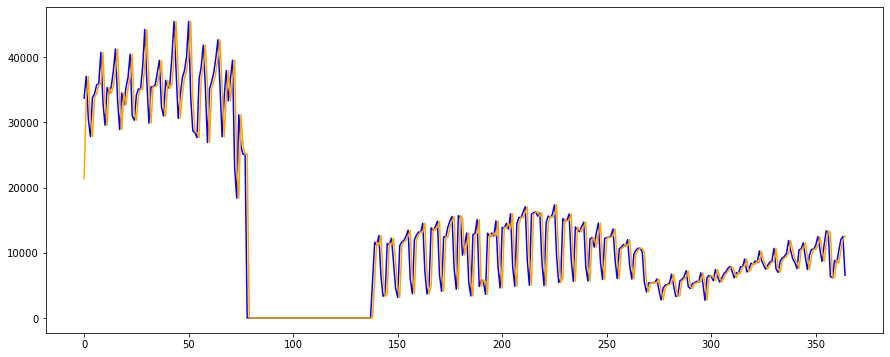

In [85]:
plt.figure(figsize=(15,6))
plt.plot(test, color='Blue')
plt.plot(predictions, color='orange')
plt.show()

Aquí vemos el RMSE de este modelo.

In [86]:
RMSE = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: ', RMSE)

RMSE:  3964.8744339149416


Para usar la red neuronal LSTM de Keras sabemos que tenemos que tener datos de entrada X y datos de salida y. Para esto podemos usar como entrada la observación del paso del tiempo (t-1), y como salida la observación del paso del tiempo actual (t).

Lograremos esto con la función de Pandas Shift(), la que empuja los valores hacia abajo en un número específico. Cada paso de tiempo del conjunto de datos de prueba se recorrerá uno a la vez. Se utilizará un modelo para hacer un pronóstico para el paso de tiempo, luego se tomará el valor esperado real del conjunto de prueba y se pondrá a disposición del modelo para el pronóstico en el próximo paso de tiempo.

A continuación definimos una función para lograr lo comentado. La serie de shift() comenzará con un 0, la  cual el modelo entenderá que desde ahí debe comenzar.

In [87]:
def sdt_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

Creamos una función para escalar los datos con MinMaxScaler entre -1 y 1, este tipo de red neuronal actúan mejor y el modelo puede llegar a tener cierta ventaja con este tipo de proceso.

In [88]:
def scale(train, test):
	# Entrenamos el escalador
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# Transformamos train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# Transformamos test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

Aquí creamos otra función la cual nos va a devolver los valores escalados a valores reales para una mejor interpretación.

In [89]:
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

La siguiente función entrenará una red neuronal secuencial.

In [90]:
def fit_lstm(train, batch_size, nb_epoch, neurons):
    # Definimos y le damos la forma a X e y
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
    # Definimos el modelo y lo configuramos con sus parámetros
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
    # Lo hacemos recorrer el parámetro Epoch
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

La siguiente función nos dará las predicciones del modelo.

In [91]:
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

Una vez creadas las funciones pasamos a utilizarlas para realizar nuestros pronósticos.


In [92]:
valores= df1.values
supervised = sdt_supervised(valores, 1)
val_sup = supervised.values

Definimos nuevamente train y test.

In [93]:
train, test = val_sup[0:-365], val_sup [-365:]

Escalamos

In [94]:
scaler, train_scaled, test_scaled= scale(train, test)

Ahora creamos un bucle for y repetimos 10 veces la red LSTM y veremos los mejores resultados.

Explicación:
* Para entrenar usamos los datos escalados de Train, batch_size de 1, Epoch  y  neuronas.
* Usamos reshape para utilizar el método predict
* Validamos como hicimos anteriormente.
* Realizamos la predicción
* Reinvertimos los datos escalados.
* Y luego sacamos el RMSE y pegamos en la lista.

In [95]:
repeticiones = 30
lista_errores= []
for x in range(repeticiones):
    # Entrenamos el modelo
    lstm = fit_lstm(train_scaled, 1, 1000, 3)
    # Pronosticamos todo el conjunto de datos de entrenamiento para construir el estado para la previsión
    train_reshape = train_scaled[:,0].reshape(len(train_scaled), 1,1)
    lstm.predict(train_reshape, batch_size=1)
    # Validación de avance en los datos de prueba
    predic = list()
    for i in range(len(test_scaled)):
        # Predicción One Step
        X, y =  test_scaled[i,0: -1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm, 1, X)
        # invertimos la escala
        yhat = invert_scale(scaler, X, yhat)
        predic.append(yhat)

    rmses = np.sqrt(mean_squared_error(valores[-365:],predictions))
    print('Test RMSE: ', x+1, rmses)
    lista_errores.append(rmses)

Test RMSE:  1 3964.8744339149416
Test RMSE:  2 3964.8744339149416
Test RMSE:  3 3964.8744339149416
Test RMSE:  4 3964.8744339149416
Test RMSE:  5 3964.8744339149416
Test RMSE:  6 3964.8744339149416
Test RMSE:  7 3964.8744339149416
Test RMSE:  8 3964.8744339149416
Test RMSE:  9 3964.8744339149416
Test RMSE:  10 3964.8744339149416
Test RMSE:  11 3964.8744339149416
Test RMSE:  12 3964.8744339149416
Test RMSE:  13 3964.8744339149416
Test RMSE:  14 3964.8744339149416
Test RMSE:  15 3964.8744339149416
Test RMSE:  16 3964.8744339149416
Test RMSE:  17 3964.8744339149416
Test RMSE:  18 3964.8744339149416
Test RMSE:  19 3964.8744339149416
Test RMSE:  20 3964.8744339149416
Test RMSE:  21 3964.8744339149416
Test RMSE:  22 3964.8744339149416
Test RMSE:  23 3964.8744339149416
Test RMSE:  24 3964.8744339149416
Test RMSE:  25 3964.8744339149416
Test RMSE:  26 3964.8744339149416
Test RMSE:  27 3964.8744339149416
Test RMSE:  28 3964.8744339149416
Test RMSE:  29 3964.8744339149416
Test RMSE:  30 3964.874

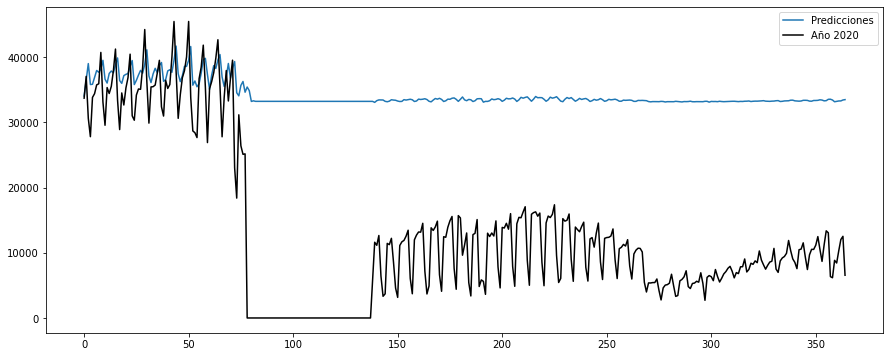

In [108]:
plt.figure(figsize=(15,6))
plt.plot(predic, label='Predicciones')
plt.plot(valores[-365:], color='black', label='Año 2020')
plt.legend()
plt.show()

Llegamos hasta aquí, obtuvimos 30 resultados diferentes para el modelo LSTM, y siempre llegamos al mismo lugar, el RMSE se mantuvo constante. Como vemos en el gráfico, en el período de cuarentena  tuvo problemas y nunca pudo realizar una predicción correcta desde ese punto.

## Conclusiones.

A lo largo de todo el informe vimos diferentes modelos, el SARIMAX, Prophet y una red neuronal. Comparamos los dos primeros que por resultado valía la pena ver que estaba pasando, y obsevamos que ambos pudieron captar la tendencia bajista que tiene nuestra serie.

Concluímos que el modelo SARIMAX fue el que mejor resultados arrojó en la métrica propuesta, pero vimos como el Prophet fue capaz de captar los puntos de cambio de tendencia a la perfección. Por esto si tomamos en cuenta que aún estamos en un año de pandemia y la estación Illia está ubicada a minutos de un aeropuerto podríamos decir que los resultados vistos son eficaces.

Como desafío personal me queda pendiente mejorar el modelo LSTM, si bien lo que busqué en este proyecto fue implementarlo correctamente antes que nada, se que es un modelo poderoso el cual podría predecir correctamente sin problemas con los mejores parámetros y más cantidad de repeticiones.

Adjunto el repositorio de GitHub: https://github.com/NicoLorenzon/Proyecto-4-Serie-De-Tiempo
                                                                                          
                                                                                            Nicolas Lorenzon.